# ODE Boundary Value Problems

## Context:

- In **initial value problems**, all the known values are specified at the same point of the independent variable, e.g. at the lower boundary ('initial value') of the interval.

- In **boundary value problems**, the know values are specified at the extremes ('boundary values') of the independent variable.


## Boundary-value problem:

The boundary value problem statement for an $n$th-order ordinary differential equation is stated as:

$$
F\left(x, f(x), \frac{df(x)}{dx}, \frac{d^2f(x)}{dx^2}, \frac{d^3f(x)}{dx^3}, \ldots, \frac{d^{n-1}f(x)}{dx^{n-1}}\right) = \frac{d^{n}f(x)}{dx^{n}},
$$

- To solve this equation on an interval of $x\in[a, b]$, we need $n$ known boundary conditions at value $a$ and $b$.


- For the 2nd order case, since we can have the boundary condition either be a value of $f(x)$ or a value of derivative $f'(x)$, we can have several different cases for the specified values. We need 2 boundary conditions to get the solution.

For example, we can have the boundary condition values specified as:

1. Two values of $f(x)$ are given, that is $f(a)$ and $f(b)$ are known. 


2. Two derivatives of $f'(x)$ are given, that is $f'(a)$ and $f'(b)$ are known.


3. Or mixed conditions from the above two cases are known, that is either $f(a)$ and $f'(b)$ are known or $f'(a)$ and $f(b)$ are known. 


- The second-order ODE boundary value problem is also called **two-Point boundary value problems**. The higher order ODE problems need additional boundary conditions, usually the values of higher derivatives of the independent variables.

#### Reference:
https://pythonnumericalmethods.berkeley.edu/notebooks/chapter23.01-ODE-Boundary-Value-Problem-Statement.html

## The shooting method for solving ODEs:

The methods devised for initial value problems do not work for boundary value problems because there are not enough initial value conditions to solve the ODE and get a unique solution. 

The shooting method was developed to overcome this difficulty. **Shooting methods** convert an ODE boundary value problem into an equivalent initial value problem. The advantage is that in initial value problems, we can start at the initial value and march forward to get the solution.

 
The idea is that we shoot at the target and observe whether or not it hits the target and how close it was. Then,based on the errors, we can adjust our aim and shoot again in the hope that it will hit close to the target.

We can see from the analogy that the shooting method is an iterative method that also involves optimisation.

### Description of the method:

Let's see how the shooting methods works using the second-order ODE given $f(a) = f_a$ and $f(b) = f_b$

$$
F\left(x, f(x), \frac{df(x)}{dx}\right) = \frac{d^{2}f(x)}{dx^{2}}
$$

- **Step 1:** We start the whole process by guessing $f'(a)=\alpha$, together with $f(a) = f_a$, we turn the above problem into an initial value problem with two conditions all on value $x=a$. This is the **aim** step. 


- **Step 2:** Using what we learned from previous chapter, i.e. we can use Runge-Kutta method, to integrate to the other boundary $b$ to find $f(b) = f_\beta$. This is the **shooting** step.  


- **Step 3:** Now we compare the value of $f_\beta$ with $f_b$, usually our initial guess is not good, and $f_\beta \ne f_b$, but what we want is $f_\beta - f_b = 0$, therefore, we adjust our initial guesses and repeat. Until the error is acceptable, we can stop. This is the iterative step. 


### How do we constraint the guess?

- The process of comparing and finding the best guesses is not easy.


- Fortunately, finding the best guess to get $f_\beta - f_b = 0$ is a root-finding problem.

- Therefore, we can use optimisation routines to search for the best guess. Since $f_\beta$ is a function of $\alpha$, therefore, the problem becomes finding the root of $g(\alpha) - f_b = 0 $.


## Example:

Let's consider a 2nd order ordinary differential equation:

$$\frac{d^2f(x)}{dx^2} = -10$$

if the independent variable is over the domain of [0, 20].

- An initial value problem would have two conditions on the same point $x=0$, i.e., we know the value of $f(x=0)$ and $f'(x=0)$.

- A boundary value problem specifies the values at e.g. $x = 0$ and $x = 20$ instead:

$f(0)  = 500$

$f(20) = 100$

In general, to solve an $n$th-order ODE, we need $n$ constraints. 

1. Solve the above ODE boundary value problem using sympy.


2. Plot the solution.


3. Now, guess the initial value of $f'(0)$ and use a shooting method to check whether the target value $f(20)$ is found.


4. If not, guess again and check the solution again.


5. Solve the root finding problem to best estimate the guess for $f'(0)$.


6. Use this guess in the shooting method routine and display the results. Do we hit the target?

### 1. Solve the above ODE boundary value problem using sympy.

In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Define symbols

f = sp.symbols("f", cls = sp.Function)
x = sp.symbols("x")


In [3]:
# Define ODE

diffeq = sp.Eq(f(x).diff(x,2) + 10, 0)

display(diffeq)

Eq(Derivative(f(x), (x, 2)) + 10, 0)

In [4]:
# Solve the ODE:

result = sp.dsolve(diffeq, f(x), ics = {f(0):500, f(20):100})

display(result)

Eq(f(x), -5*x**2 + 80*x + 500)

In [5]:
# Define function f(x)
f_x = lambda x, s: -5*x**2 + 80*x + 500 # this is y(x)

# Spacing
h_1 = 0.1

# Initial/boundary conditions
x_00 = 0.
x_20 = 20.

f_00 = 500.
f_20 = 100.

# x_axis
x_axis = np.arange(x_00, x_20 + h_1, h_1)

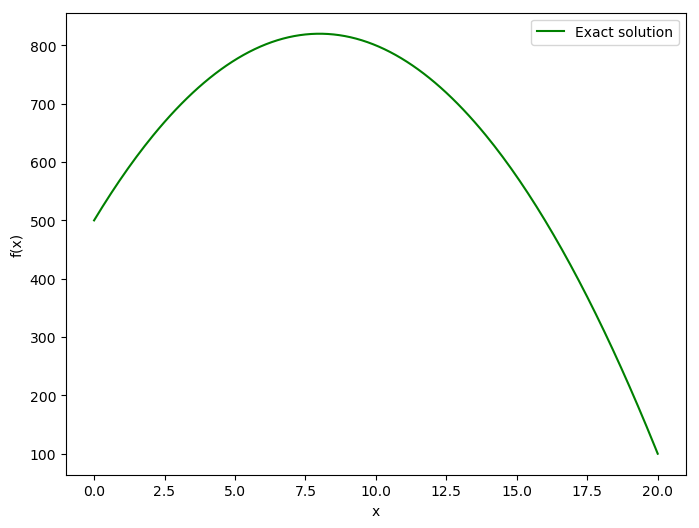

In [6]:
# Plotting

plt.figure(figsize = (8,6))

plt.plot(x_axis, f_x(x_axis, f_00), "g", label = "Exact solution")

plt.xlabel('x')
plt.ylabel('f(x)')

#plt.xlim(0,2.0)
#plt.ylim(0,1.1)

plt.legend()
plt.show()

### 3. Now, guess the initial value of $f'(0)$ and use a shooting method to check whether the target value $f(20)$ is found.

In [7]:
# Slope function

func = lambda x, s: np.dot(np.array([[0, 1], [0, -10/s[1]]]), s)

In [8]:
from scipy.integrate import solve_ivp

In [9]:
# Guess 1 for f'(0):

v_00 = 0.1

In [10]:
# Find the solution using the shooting method

sol = solve_ivp(func, [x_00, x_20], [f_00, v_00], method='RK45', t_eval = x_axis)

In [11]:
#print(sol.t)

In [12]:
#print(sol.y[0])

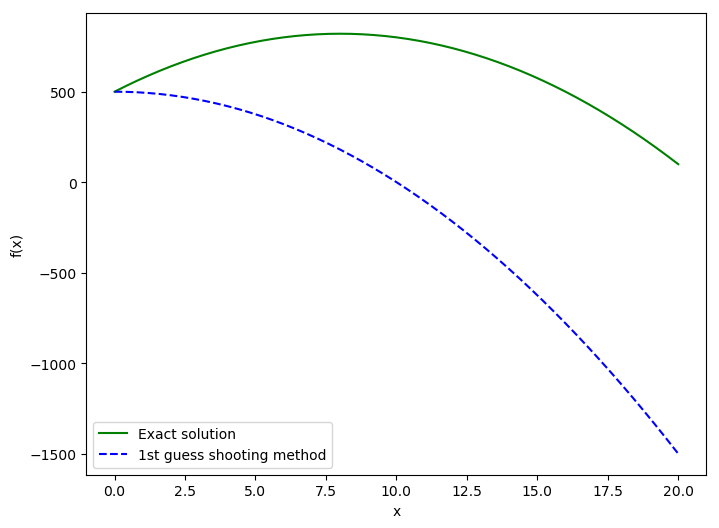

In [13]:
# Plotting

plt.figure(figsize = (8,6))

plt.plot(x_axis, f_x(x_axis, f_00), "g", label = "Exact solution")
plt.plot(sol.t, sol.y[0], "b", linestyle = '--', label ="1st guess shooting method")

plt.xlabel('x')
plt.ylabel('f(x)')

#plt.xlim(0,2.0)
#plt.ylim(0,1.1)

plt.legend()
plt.show()

In [14]:
# Guess 2 for f'(0):

v_00 = 200

# Find the solution using the shooting method

sol_2 = solve_ivp(func, [x_00, x_20], [f_00, v_00], method='RK45', t_eval = x_axis)

/opt/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


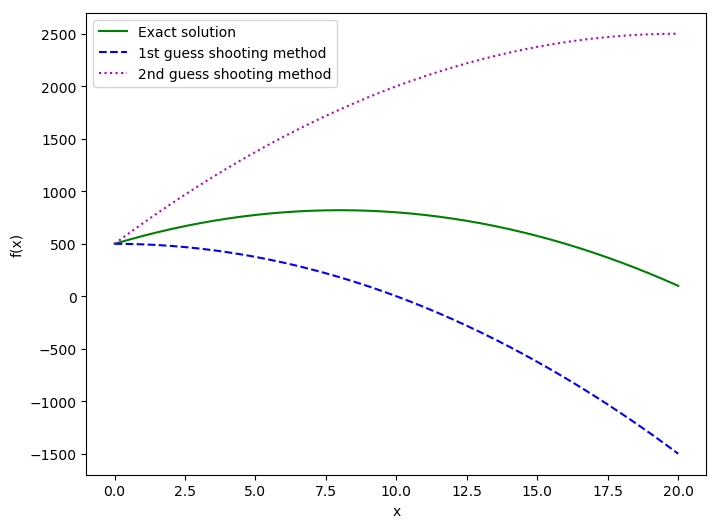

In [15]:
# Plotting

plt.figure(figsize = (8,6))

plt.plot(x_axis, f_x(x_axis, f_00), "g", label = "Exact solution")
plt.plot(sol.t, sol.y[0], "b", linestyle = '--', label ="1st guess shooting method")
plt.plot(sol_2.t, sol_2.y[0], "m", linestyle = ':', label ="2nd guess shooting method")

plt.xlabel('x')
plt.ylabel('f(x)')

#plt.xlim(0,2.0)
#plt.ylim(0,1.1)

plt.legend()
plt.show()

## Optimisation:

See: 
https://github.com/wbandabarragan/computational-physics-1/blob/main/unit-3/305-root-finding-methods.ipynb

In [16]:
import scipy.optimize as opt

In [17]:
# Objective Function

def obj_function(v_guess):
    
    # Solution with this guess
    sol = solve_ivp(func, [x_00, x_20], [f_00, v_guess], method='RK45', t_eval = x_axis)
    
    # Extract last solution
    last_f = sol.y[0][-1]
    
    return last_f - f_20
    

In [18]:
new_v00 = opt.fsolve(obj_function, 0.1)

print(new_v00)

[80.]


/opt/anaconda3/envs/py37/lib/python3.7/site-packages/scipy/integrate/_ivp/base.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  y0 = np.asarray(y0)


In [19]:
sol_opt = solve_ivp(func, [x_00, x_20], [f_00, new_v00], method='RK45', t_eval = x_axis)



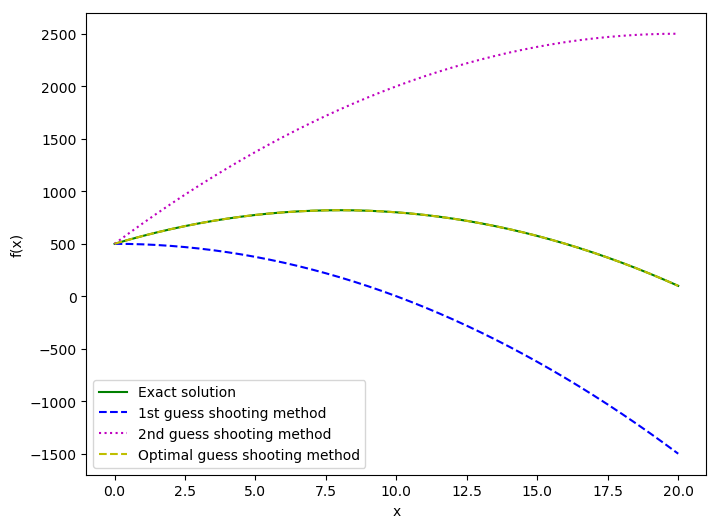

In [20]:
# Plotting

plt.figure(figsize = (8,6))

plt.plot(x_axis, f_x(x_axis, f_00), "g", label = "Exact solution")

plt.plot(sol.t, sol.y[0], "b", linestyle = '--', label ="1st guess shooting method")
plt.plot(sol_2.t, sol_2.y[0], "m", linestyle = ':', label ="2nd guess shooting method")

plt.plot(sol_opt.t, sol_opt.y[0], "y", linestyle = '--', label ="Optimal guess shooting method")

plt.xlabel('x')
plt.ylabel('f(x)')

#plt.xlim(0,2.0)
#plt.ylim(0,1.1)

plt.legend()
plt.show()